In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import sklearn.datasets


In [27]:
breastdata= sklearn.datasets.load_breast_cancer()
df= pd.DataFrame(breastdata.data, columns= breastdata.feature_names)

In [28]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
df.shape

(569, 30)

In [30]:
df['label']=breastdata.target


In [31]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [33]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [34]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [35]:
df['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

In [36]:
df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [37]:
x= df.drop(columns='label',axis=1)
y= df['label']

In [38]:
x_train,x_test,y_train,y_test= train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)

In [39]:
model= LogisticRegression(max_iter=3000)
model.fit(x_train,y_train)


LogisticRegression(max_iter=3000)

In [40]:
ypred = model.predict(x_train)
acc= accuracy_score(ypred, y_train)
print('accuracy of train data', acc)

accuracy of train data 0.9560439560439561


In [41]:
ypred2 = model.predict(x_test)
acc2= accuracy_score(ypred2, y_test)
print('accuracy of test data', acc2)

accuracy of test data 0.9649122807017544


In [42]:
input_data=(16.13,20.68,108.1,798.8,0.117,0.2022,0.1722,0.1028,0.2164,0.07356,0.5692,1.073,3.854,54.18,0.007026,0.02501,0.03188,0.01297,0.01689,0.004142,20.96,31.48,136.8,1315,0.1789,0.4233,0.4784,0.2073,0.3706,0.1142)
data= np.asarray(input_data)
data= data.reshape(1,-1)
pred3= model.predict(data)
print(pred3)

if (pred3[0]==0):
    print('the breast cancer is malignant')
else:
    print('the breast cancer is malignant')    
    


[0]
the breast cancer is malignant


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [43]:
# building a nueral network
import tensorflow as tf

In [44]:
tf.random.set_seed(3)
from tensorflow import keras

In [45]:
# seeting the layers for network
model= keras.Sequential([
                         keras.layers.Flatten(input_shape=(30,)),

                         keras.layers.Dense(20, activation='relu'),

                         keras.layers.Dense(2,activation='sigmoid')
                         ])

In [46]:
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'
              ])

In [47]:
history= model.fit(x_train, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 16ms/step - loss: 207.0100 - accuracy: 0.3594 - val_loss: 147.7102 - val_accuracy: 0.5000
Epoch 2/10
13/13 [==============================] - 0s 3ms/step - loss: 161.6060 - accuracy: 0.3594 - val_loss: 113.8100 - val_accuracy: 0.5000
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 121.1346 - accuracy: 0.3594 - val_loss: 82.7069 - val_accuracy: 0.5000
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 85.3689 - accuracy: 0.3594 - val_loss: 54.3408 - val_accuracy: 0.5000
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 50.6581 - accuracy: 0.3594 - val_loss: 25.4797 - val_accuracy: 0.5000
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 14.1436 - accuracy: 0.4205 - val_loss: 4.0804 - val_accuracy: 0.5000
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 4.8815 - accuracy: 0.6528 - val_loss: 1.6175 - val_accuracy: 0.6739
Epo

In [50]:
scaler= StandardScaler()
x_train_std= scaler.fit_transform(x_train)
x_test_st= scaler.transform(x_test)

In [52]:
history= model.fit(x_train_std, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 30ms/step - loss: 0.8548 - accuracy: 0.4132 - val_loss: 0.6585 - val_accuracy: 0.5652
Epoch 2/10
13/13 [==============================] - 0s 7ms/step - loss: 0.4320 - accuracy: 0.7604 - val_loss: 0.4695 - val_accuracy: 0.6957
Epoch 3/10
13/13 [==============================] - 0s 8ms/step - loss: 0.2842 - accuracy: 0.8924 - val_loss: 0.3556 - val_accuracy: 0.8478
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2126 - accuracy: 0.9340 - val_loss: 0.2766 - val_accuracy: 0.8478
Epoch 5/10
13/13 [==============================] - 0s 9ms/step - loss: 0.1699 - accuracy: 0.9535 - val_loss: 0.2230 - val_accuracy: 0.9348
Epoch 6/10
13/13 [==============================] - 0s 8ms/step - loss: 0.1425 - accuracy: 0.9658 - val_loss: 0.1886 - val_accuracy: 0.9348
Epoch 7/10
13/13 [==============================] - 0s 8ms/step - loss: 0.1225 - accuracy: 0.9707 - val_loss: 0.1682 - val_accuracy: 0.9348
Epoch 8/10
13/13 [=

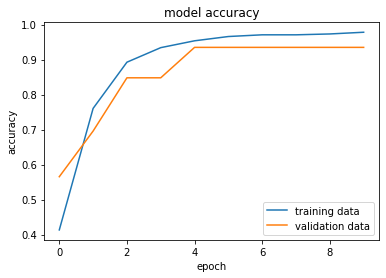

In [53]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training data', 'validation data'], loc= 'lower right')



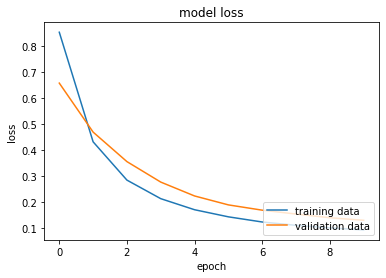

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training data', 'validation data'], loc= 'lower right')


In [55]:
loss, accuracy= model.evaluate(x_test_st,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.1163 - accuracy: 0.9649


In [56]:
ypred= model.predict(x_test_st)


In [57]:
y_pred_labels=[np.argmax(i) for i in ypred]
print(y_pred_labels)

[0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1]


In [58]:
# building the predictive system

input_data=(13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259
)
data= np.asarray(input_data)
data= data.reshape(1,-1)
datastd= scaler.transform(data)
prediction= model.predict(datastd)
label= [np.argmax(prediction)]
if label[0]==0:
  print('malignnant')
else:
  print('benign')

benign


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
